# Gradient Descent

## Chamando módulos

In [1]:
# Including epamodule.jl
include("../epamodule/epamodule.jl")
em = Main.epamodule

# Including epanet.jl
include("../epanet/epanet.jl")
epa = Main.epanet

# Including derivative.jl
include("./derivative.jl")
d = Main.derivative

Main.derivative

In [2]:
values = Dict{Float64, Dict{Int64, Float64}}(20.0 => Dict(6 =>26.434926986694336,11 => 34.299713134765625,15 => 32.01907730102539), 
    30.0 => Dict(6 =>26.037752151489258,11 => 34.08491516113281, 15 => 31.50044059753418), 
    50.0 => Dict(6 =>24.853008270263672,11 => 33.45237731933594, 15 => 29.963409423828125 ), 
    55.0 => Dict(6 =>24.47783660888672, 11 => 33.25362014770508, 15 => 29.47846031188965 ),
    60.0 => Dict(6 =>24.071619033813477,11 => 33.03902816772461, 15 => 28.954042434692383),
    70.0 => Dict(6 =>23.16685676574707, 11 => 32.56293487548828, 15 => 27.788007736206055))  

Dict{Float64,Dict{Int64,Float64}} with 6 entries:
  30.0 => Dict(11=>34.0849,15=>31.5004,6=>26.0378)
  50.0 => Dict(11=>33.4524,15=>29.9634,6=>24.853)
  55.0 => Dict(11=>33.2536,15=>29.4785,6=>24.4778)
  60.0 => Dict(11=>33.039,15=>28.954,6=>24.0716)
  70.0 => Dict(11=>32.5629,15=>27.788,6=>23.1669)
  20.0 => Dict(11=>34.2997,15=>32.0191,6=>26.4349)

## Inicializando structs

In [3]:
path_nodes = "../../networks/b-town/nodes"
path_links = "../../networks/b-town/links"
path_inp = "../../networks/b-town/rede.inp"
path_saida = "./tests/dados17.csv"

"./tests/dados17.csv"

In [4]:
println("Iniciando struct paths")
paths = epa.Paths(path_nodes, path_links, path_inp, path_saida)
println("Iniciando simulação")
epa.start(paths)
println("Iniciando network")
group_link = Dict{Int64, Array{Int64,1}}(1 => em.ENgetlinkindex.(["2","3","15","14","13","12","11","10","1"]), 2=>em.ENgetlinkindex.(["16","17","18","19","20"]), 3=> em.ENgetlinkindex.(["5","4","6","7","8","9"]))
net = epa.Network(paths, 3, group_link, values)

Iniciando struct paths
Iniciando simulação
Iniciando network
  Page 1                                    Wed Dec 23 12:16:16 2020

  ******************************************************************
  *                           E P A N E T                          *
  *                   Hydraulic and Water Quality                  *
  *                   Analysis for Pipe Networks                   *
  *                         Version 2.2                            *
  ******************************************************************
  
  Analysis begun Wed Dec 23 12:16:16 2020


Main.epanet.Network([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], Dict(2 => [15, 16, 17, 18, 19],3 => [4, 3, 5, 6, 7, 8],1 => [1, 2, 14, 13, 12, 11, 10, 9, 20]), Dict(30.0 => Dict(11 => 34.08491516113281,15 => 31.50044059753418,6 => 26.037752151489258),50.0 => Dict(11 => 33.45237731933594,15 => 29.963409423828125,6 => 24.853008270263672),55.0 => Dict(11 => 33.25362014770508,15 => 29.47846031188965,6 => 24.47783660888672),60.0 => Dict(11 => 33.03902816772461,15 => 28.954042434692383,6 => 24.071619033813477),70.0 => Dict(11 => 32.56293487548828,15 => 27.788007736206055,6 => 23.16685676574707),20.0 => Dict(11 => 34.299713134765625,15 => 32.01907730102539,6 => 26.434926986694336)))

In [5]:
group_link

Dict{Int64,Array{Int64,1}} with 3 entries:
  2 => [15, 16, 17, 18, 19]
  3 => [4, 3, 5, 6, 7, 8]
  1 => [1, 2, 14, 13, 12, 11, 10, 9, 20]

In [13]:
rg1 = 0.012 # 0.01
rg2 = 0.001 # 0.079
rg3 = 0.01 # 0.115
intime_smvalues = epa.Simulation(Dict{Int64,Float64}(1 => rg1, 2=>rg2, 3 => rg3)) 
epa.update_network_values(net,intime_smvalues)

In [14]:
ln = 0.001

0.001

In [15]:
a = [1.0, 0.01, 0.0001]

3-element Array{Float64,1}:
 1.0
 0.01
 0.0001

In [16]:
gradiente = Dict{Int64, Float64}(1 => 1, 2 => 2, 3=> 3)

Dict{Int64,Float64} with 3 entries:
  2 => 2.0
  3 => 3.0
  1 => 1.0

In [17]:
function verifica_grad(d)    
    for (posicao, valor) in d
        if abs(valor) > 0.002
            return true
        end
    end
    return false
end

verifica_grad (generic function with 1 method)

In [18]:
function step(gradiente, intime_smvalues, net)
    interacao = 1
    dados = Array{Float64,1}()
    while verifica_grad(gradiente)
        for (posicao, derivada) in gradiente
            if abs(d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)) > 0.001
                Δ = d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)/abs(d.calcula_derivada_segunda(net, intime_smvalues.link_values[posicao], posicao))
                if intime_smvalues.link_values[posicao] - Δ < 0.001
                    intime_smvalues.link_values[posicao] = 0.001
                    continue
                elseif intime_smvalues.link_values[posicao] - Δ > 0.2
                    intime_smvalues.link_values[posicao] = 0.2
                    continue
                else
                    intime_smvalues.link_values[posicao] -= Δ
                end
                gradiente[posicao] = d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)
                v = epa.simula(net, intime_smvalues.link_values[posicao], posicao)
                println(v)
                append!(dados, v)
                interacao += 1
            end
            if interacao > 50
                return dados
            end
        end
    end
    return dados
end

step (generic function with 1 method)

In [19]:
dados = step(gradiente, intime_smvalues, net)

0.0157729254828559
0.014677153693305122
0.016326480441623263
0.014746136135525174
0.007920583089192709
0.014169692993164062
0.24192820654975045
0.239990234375
0.2005343967013889
0.1952511469523112
0.2106080585055881
0.2097865210639106
0.13106589847140843
0.06917974683973524
0.08489460415310329
0.09481059180365668
0.12624359130859375
0.042805459764268666
0.04239792293972439
0.0399528079562717
0.03556166754828559
0.039218372768825956
0.09125200907389323
0.050979296366373696
0.10737281375461155
0.035584343804253474
0.06466823154025608
0.03460693359375
0.2175912857055664
0.15274196200900608
0.12624359130859375
0.042805459764268666
0.04239792293972439
0.0399528079562717
0.03556166754828559
0.039218372768825956
0.09125200907389323
0.050979296366373696
0.10737281375461155
0.035584343804253474
0.06466823154025608
0.03460693359375
0.2175912857055664
0.15274196200900608
0.12624359130859375
0.042805459764268666
0.04239792293972439
0.0399528079562717
0.03556166754828559
0.039218372768825956


50-element Array{Float64,1}:
 0.0157729254828559
 0.014677153693305122
 0.016326480441623263
 0.014746136135525174
 0.007920583089192709
 0.014169692993164062
 0.24192820654975045
 0.239990234375
 0.2005343967013889
 0.1952511469523112
 0.2106080585055881
 0.2097865210639106
 0.13106589847140843
 ⋮
 0.10737281375461155
 0.035584343804253474
 0.06466823154025608
 0.03460693359375
 0.2175912857055664
 0.15274196200900608
 0.12624359130859375
 0.042805459764268666
 0.04239792293972439
 0.0399528079562717
 0.03556166754828559
 0.039218372768825956

## Plotando os dados

In [20]:
#]add PyPlot

In [21]:
#ENV["PYTHON"]=""
#Pkg.build("PyCall")

In [22]:
#import Pkg
#Pkg.add("Conda")
#import Conda
#Conda.add("matplotlib")
using PyPlot

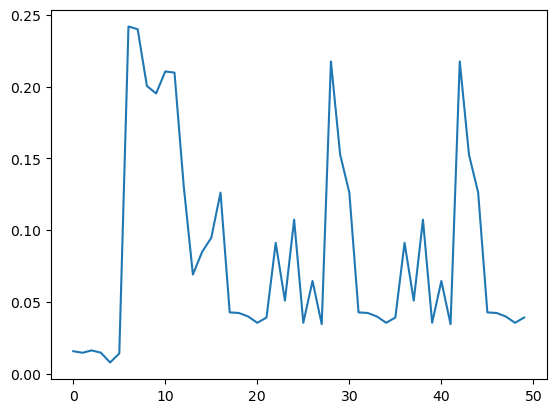

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1067d3a400>

In [23]:
plot(dados)
#scene = lines(1:50, dados, color = :blue)

In [41]:
function step2(gradiente, intime_smvalues, net)
    interacao = 1
    dados = Array{Float64,1}()
    d1 = Array{Float64,1}()
    d2 = Array{Float64,1}()
    d3 = Array{Float64,1}()
    while verifica_grad(gradiente)
        for (posicao, derivada) in gradiente
            if abs(d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)) > 0.001
                Δ = ln*d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)
                if intime_smvalues.link_values[posicao] - Δ < 0.001
                    intime_smvalues.link_values[posicao] = 0.001
                    continue
                elseif intime_smvalues.link_values[posicao] - Δ > 0.2
                    intime_smvalues.link_values[posicao] = 0.2
                    continue
                else
                    intime_smvalues.link_values[posicao] -= Δ
                end
                gradiente[posicao] = d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)
                v = epa.simula(net, intime_smvalues.link_values[posicao], posicao)
                println(v)
                append!(dados, v)
                if posicao == 1
                    append!(d1, d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao))
                elseif posicao == 2
                    append!(d2, d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao))
                elseif posicao == 3
                    append!(d3, d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao))
                end
                    interacao += 1
            end
            if interacao > 50
                return dados,d1,d2,d3
            end
        end
    end
    return dados,d1,d2,d3
end

step2 (generic function with 1 method)

In [15]:
dados2,d1,d2,d3 = step2(gradiente, intime_smvalues, net)

0.13630008697509766
0.13422097100151908
0.13212288750542533
0.1300055185953776
0.1278676986694336
0.12570953369140625
0.12352848052978516
0.12132485707600911
0.11910014682345921
0.11685572730170356
0.1145885255601671
0.11229525672064887
0.10997751024034289
0.10763761732313368
0.10527398851182726
0.10288185543484157
0.10046789381239149
0.09802468617757161
0.09555117289225261
0.0930477778116862
0.09052128261990017
0.08795897165934245
0.08537059360080296
0.08275148603651258
0.08009730445014106
0.07740773095024957
0.0746824476453993
0.07192601097954644
0.06913110944959852
0.06632974412706164
0.06441932254367405
0.06431537204318577
0.06393580966525608
0.06383154127332899
0.06345134311252171
0.06334675682915582
0.06296253204345703
0.06285805172390407
0.062471495734320745
0.062367545233832464
0.06197982364230686
0.06187555525037977
0.06148370107014974
0.06137911478678385
0.06098514133029514
0.06088076697455512
0.060486157735188804
0.06038082970513238
0.059983783298068576
0.05987887912326389


([0.13630008697509766, 0.13422097100151908, 0.13212288750542533, 0.1300055185953776, 0.1278676986694336, 0.12570953369140625, 0.12352848052978516, 0.12132485707600911, 0.11910014682345921, 0.11685572730170356  …  0.06197982364230686, 0.06187555525037977, 0.06148370107014974, 0.06137911478678385, 0.06098514133029514, 0.06088076697455512, 0.060486157735188804, 0.06038082970513238, 0.059983783298068576, 0.05987887912326389], [1.4400482177734375, 1.4464060465493869, 1.4527638753254746, 1.4601813422308874, 1.4670689900715683, 1.4750162760415744, 1.4834933810763813, 1.4903810289171318, 1.4956792195637558, 1.5036265055338311  …  0.6802876790364815, 0.680817498101144, 0.683466593424456, 0.6824069552951312, 0.6871753268771624, 0.6871753268771624, 0.6908840603298688, 0.6919436984591937, 0.6940629747178781, 0.6972418891059219], Float64[], [-0.14623006184891207, -0.14464060465499418, -0.14623006184898146, -0.14411078559033175, -0.1467598809136092, -0.14623006184894677, -0.14411078559026236, -0.146

In [28]:
d2

25-element Array{Float64,1}:
 -0.12556711832686918
  0.17854902479380597
  0.1774893866644811
  0.17854902479394474
  0.1774893866644811
  0.17801920572907415
  0.17907884385853778
  0.18013848198786264
  0.17854902479380597
  0.1811981201171875
  0.17801920572921293
  0.17960866292313082
  0.17801920572921293
  0.17907884385853778
  0.17854902479380597
  0.1774893866644811
  0.17801920572907415
  0.17801920572907415
  0.17589992947042443
  0.18013848198786264
  0.17801920572921293
  0.17854902479380597
  0.17854902479394474
  0.17695956759988807
  0.1774893866644811

In [29]:
d3

1-element Array{Float64,1}:
 -1.1677212185329937

In [30]:
d1

24-element Array{Float64,1}:
 1.2196434868706751
 1.2238820393879746
 1.228120591905274
 1.2323591444227122
 1.2355380588106868
 1.239246792263532
 1.2408362494574499
 1.246134440104213
 1.2493133544921875
 1.251962449815569
 1.257260640462332
 1.2620290120442246
 1.264148288303013
 1.2683868408203125
 1.2742148505316686
 1.2800428602430247
 1.2811024983724884
 1.2874603271484375
 1.290639241536412
 1.2954076131184433
 1.2996461656357428
 1.3054741753472376
 1.3070636325411555
 1.3139512803819753

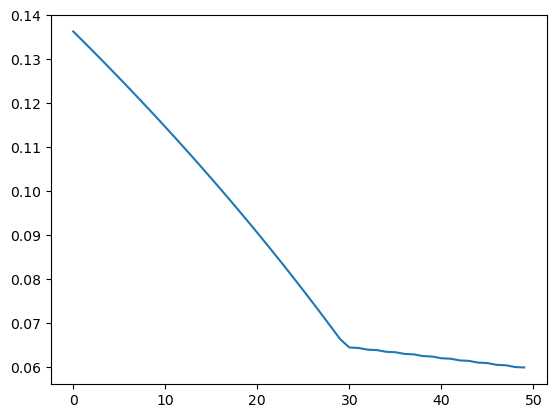

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d570da250>

In [16]:
plot(dados2)

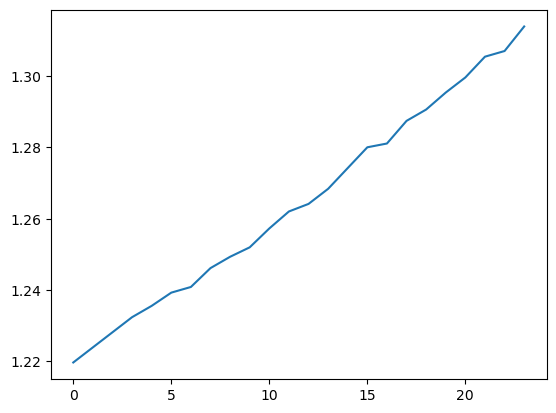

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb01401a370>

In [33]:
plot(d1)

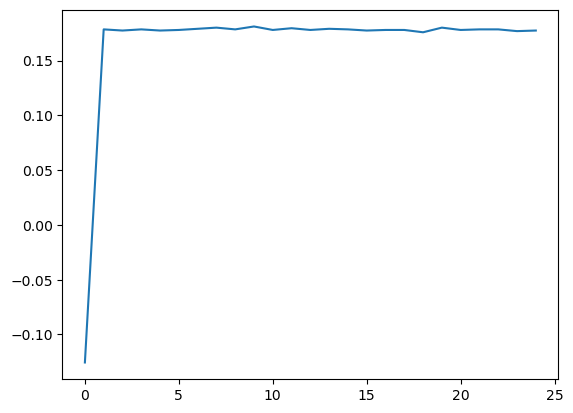

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fafef74fac0>

In [34]:
plot(d2)

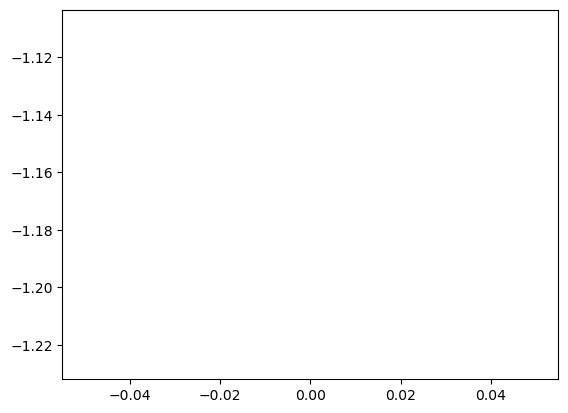

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fafef724c70>

In [35]:
plot(d3)

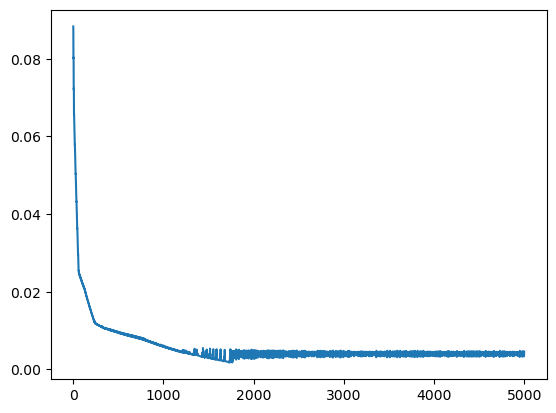

d1 = Main.epanet.Simulation(Dict(2 => 0.06496187676323799,3 => 0.10947564866807719,1 => 0.010170004950629311)).link_values[1]
d2 = Main.epanet.Simulation(Dict(2 => 0.06496187676323799,3 => 0.10947564866807719,1 => 0.010170004950629311)).link_values[2]
d3 = Main.epanet.Simulation(Dict(2 => 0.06496187676323799,3 => 0.10947564866807719,1 => 0.010170004950629311)).link_values[3]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d4ba77040>

In [52]:
function step3(gradiente, intime_smvalues, net)
    interacao = 1
    dados = Array{Float64,1}()
    d1 = Array{Float64,1}()
    d2 = Array{Float64,1}()
    d3 = Array{Float64,1}()
    while verifica_grad(gradiente)
        for (posicao, derivada) in gradiente
            if abs(d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)) > 0.002
                Δ = ln*d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)
                if intime_smvalues.link_values[posicao] - Δ < 0.001
                    intime_smvalues.link_values[posicao] = 0.001
                    continue
                elseif intime_smvalues.link_values[posicao] - Δ > 0.2
                    intime_smvalues.link_values[posicao] = 0.2
                    continue
                else
                    intime_smvalues.link_values[posicao] -= Δ
                end
                gradiente[posicao] = d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)
                v = epa.simula(net, intime_smvalues.link_values[posicao], posicao)
                #println(v)
                append!(dados, v)
                if posicao == 1
                    append!(d1, d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao))
                elseif posicao == 2
                    append!(d2, d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao))
                elseif posicao == 3
                    append!(d3, d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao))
                end
                    interacao += 1
            end
            if interacao > 500
                println("d1 = $intime_smvalues.link_values[1]")
                println("d2 = $intime_smvalues.link_values[2]")
                println("d3 = $intime_smvalues.link_values[3]")
                return dados,d1,d2,d3
            end
        end
    end
    println("d1 = $(intime_smvalues.link_values[1])")
    println("d2 = $(intime_smvalues.link_values[2])")
    println("d3 = $(intime_smvalues.link_values[3])")
    return dados,d1,d2,d3
end
dados3, d1,d2,d3 = step3(gradiente, intime_smvalues, net)
plot(dados3)

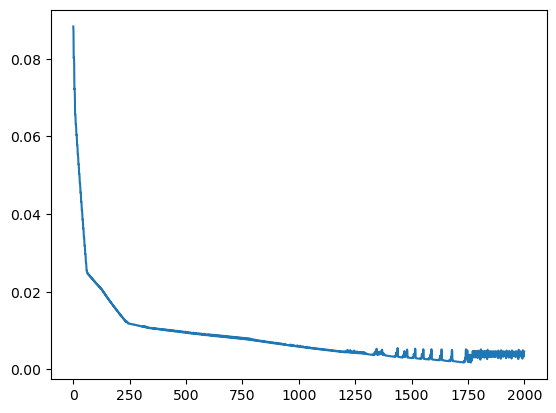

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d717d8280>

In [56]:
plot(dados3[1:2000])

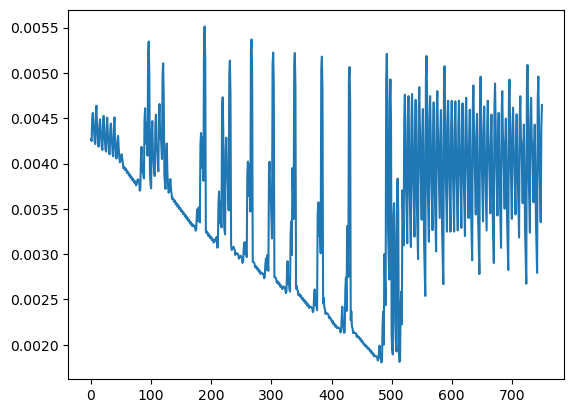

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d717aaf10>

In [57]:
plot(dados3[1250:2000])

In [55]:
minimum(dados3)

0.0018048816257052952

In [45]:
function calcula_distancia(intime_smvalues)
    return sqrt((intime_smvalues.link_values[1]-0.001)^2 + (intime_smvalues.link_values[2]-0.079)^2 + (intime_smvalues.link_values[3]-0.115)^2)
end

calcula_distancia (generic function with 1 method)

In [46]:
intime_smvalues = epa.Simulation(Dict{Int64,Float64}(1 => 0.01, 2=> 0.01, 3 => 0.02)) 
epa.update_network_values(net,intime_smvalues)

"Error: 6"

In [53]:
calcula_distancia(intime_smvalues)

0.017654357888170304

In [58]:
function verifica_grad(d)    
    for (posicao, valor) in d
        if abs(valor) > 0.002
            return true
        end
    end
    return false
end

verifica_grad (generic function with 1 method)

# Tamanho do passo: 0.001 fixo

In [114]:
rg1 = 0.012 # 0.01
rg2 = 0.001 # 0.079
rg3 = 0.01 # 0.115
intime_smvalues = epa.Simulation(Dict{Int64,Float64}(1 => rg1, 2=>rg2, 3 => rg3)) 
epa.update_network_values(net,intime_smvalues)

MethodError: MethodError: no method matching update_network_values(::Main.epanet.Network, ::Main.epanet.Simulation)
Closest candidates are:
  update_network_values(!Matched::Main.epanet.Network, ::Main.epanet.Simulation) at /home/augusto/Documents/IC-2020/optimized-calibration/src/epanet/epanet.jl:98

In [180]:
function step4(gradiente, intime_smvalues, net)
    interacao = 1
    dados = Array{Float64,1}()
    d1 = Array{Float64,1}()
    d2 = Array{Float64,1}()
    d3 = Array{Float64,1}()
    while verifica_grad(gradiente)
        for (posicao, derivada) in gradiente
            if abs(d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)) > 0.001
                Δ = d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)
                if Δ < 0
                    Δ = -0.001
                elseif Δ > 0
                    Δ = 0.001
                else
                    Δ = 0
                end 
                if intime_smvalues.link_values[posicao] - Δ < 0.001
                    intime_smvalues.link_values[posicao] = 0.001
                    continue
                elseif intime_smvalues.link_values[posicao] - Δ > 0.2
                    intime_smvalues.link_values[posicao] = 0.2
                    continue
                else
                    intime_smvalues.link_values[posicao] -= Δ
                end
                gradiente[posicao] = d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)
                v = epa.simula(net, intime_smvalues.link_values[posicao], posicao)
                #println(v)
                #v = d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao)
                append!(dados, v)
                if posicao == 1
                    append!(d1, d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao))
                elseif posicao == 2
                    append!(d2, d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao))
                elseif posicao == 3
                    append!(d3, d.calcula_derivada(net, intime_smvalues.link_values[posicao], posicao))
                end
                    interacao += 1
                if !verifica_grad(gradiente)
                    return dados,d1,d2,d3
                end
            end
            if interacao > 5000
                println("d1 = $intime_smvalues.link_values[1]")
                println("d2 = $intime_smvalues.link_values[2]")
                println("d3 = $intime_smvalues.link_values[3]")
                return dados,d1,d2,d3
            end
        end
    end
    println("d1 = $(intime_smvalues.link_values[1])")
    println("d2 = $(intime_smvalues.link_values[2])")
    println("d3 = $(intime_smvalues.link_values[3])")
    return dados,d1,d2,d3
end
gradiente = Dict{Int64, Float64}(1 => 1, 2 => 2, 3=> 3)
dados, d1,d2,d3 = step4(gradiente, intime_smvalues, net)
plot(dados)

InterruptException: InterruptException:

In [179]:
minimum(dados)

0.020411385430230036

In [74]:
plot(d.calcula_derivada.(net, 0.001:0.001:0.02, 1))

MethodError: MethodError: no method matching length(::Main.epanet.Network)
Closest candidates are:
  length(!Matched::Core.SimpleVector) at essentials.jl:596
  length(!Matched::Base.MethodList) at reflection.jl:852
  length(!Matched::Core.MethodTable) at reflection.jl:938
  ...

In [91]:
d1 = Array{Float64,1}()
d2 = Array{Float64,1}()
d3= Array{Float64,1}()
for i in 0.001:0.001:0.2
    append!(d1, d.calcula_derivada(net, i, 1))
    append!(d2, d.calcula_derivada(net, i, 2))
    append!(d3, d.calcula_derivada(net, i, 3))
end

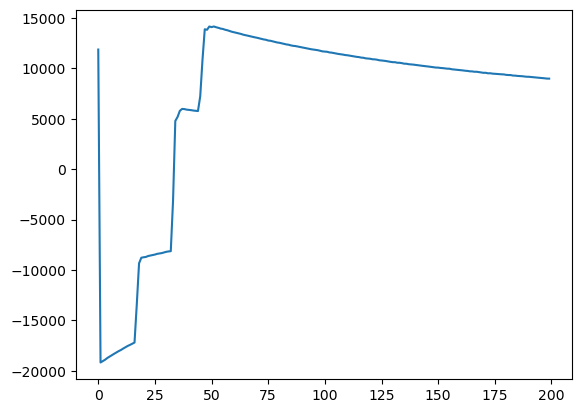

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d4b4fe460>

In [92]:
plot(d1)

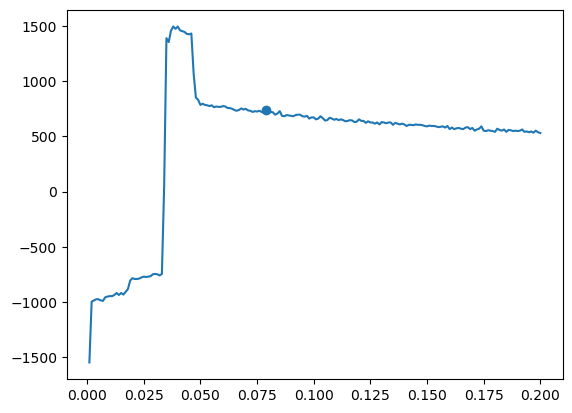

PyObject <matplotlib.collections.PathCollection object at 0x7f8d4b36d370>

In [93]:
plot( 1e-3:1e-3:2e-1,d2)
scatter(0.079, d.calcula_derivada(net, 0.079, 2))

In [99]:
findall(x -> x==0, d1)

0-element Array{Int64,1}

In [151]:
function cdiff(net, rugosidade::Float64, numero_grupo::Int64)
    h = 0.001
    value = 0
    # f(x)-f(x-h)
    #      h
    value += (epa.f(net, rugosidade, numero_grupo) - epa.f(net,rugosidade-h, numero_grupo))/h
    # f(x+h)-f(x)
    #      h
    value += (epa.f(net, rugosidade+h, numero_grupo) - epa.f(net, rugosidade, numero_grupo))/h
    # f(x+h)-f(x-h)
    #      2h
    value += (epa.f(net, rugosidade+h, numero_grupo) - epa.f(net, rugosidade-h, numero_grupo))/(h*2)
    return value
    
end

cdiff (generic function with 1 method)

In [152]:
d1 = Array{Float64,1}()
d2 = Array{Float64,1}()
d3= Array{Float64,1}()
for i in 0.001:0.001:0.2
    append!(d1, cdiff(net, i, 1))
    append!(d2, cdiff(net, i, 2))
    append!(d3, cdiff(net, i, 3))
end

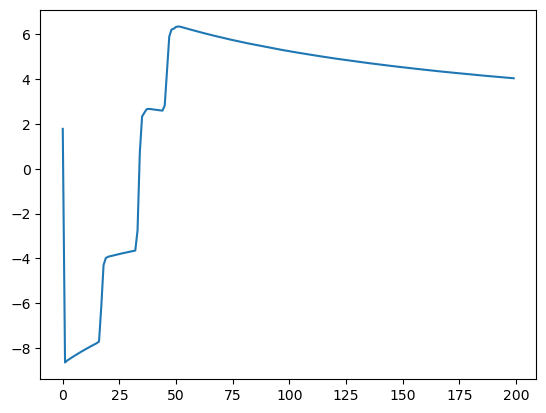

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d4ae56e20>

In [153]:
plot(d1)

In [145]:
findall(x -> x == 0, d1)

0-element Array{Int64,1}

In [146]:
d3

200-element Array{Float64,1}:
 -3.574689229329242
 -3.5508473714192244
 -3.5254160563150116
 -3.5015741984049944
 -3.469785054524832
 -3.4443537394204107
 -3.423690795898576
 -3.4014383951821294
 -3.3728281656901506
 -3.352165222167899
 -3.3283233642578818
 -3.3076604207356306
 -3.2869974772133794
  ⋮
  1.734097798664902
  1.7293294270831483
  1.71661376953125
  1.7197926839188082
  1.72615051269559
  1.7102559407544682
  1.7134348551436918
  1.7023086547851562
  1.70707702636691
  1.695950826009207
  1.6975402832034026
  1.6895929972324253

In [154]:
rg1 = 0.01 # 0.01
rg2 = 0.079 # 0.079
rg3 = 0.115 # 0.115
intime_smvalues = epa.Simulation(Dict{Int64,Float64}(1 => rg1, 2=>rg2, 3 => rg3)) 
epa.update_network_values(net,intime_smvalues)

In [168]:
function cdiff(net, rugosidade::Float64, numero_grupo::Int64)
    h = 0.001
    value = 0
    # f(x)-f(x-h)
    #      h
    #value += (epa.f(net, rugosidade, numero_grupo) - epa.f(net,rugosidade-h, numero_grupo))/h
    # f(x+h)-f(x)
    #      h
    value += (epa.f(net, rugosidade+h, numero_grupo) - epa.f(net, rugosidade, numero_grupo))/h
    # f(x+h)-f(x-h)
    #      2h
    value += (epa.f(net, rugosidade+h, numero_grupo) - epa.f(net, rugosidade-h, numero_grupo))/(h*2)
    return value/2
    
end

cdiff (generic function with 1 method)

In [169]:
d1 = Array{Float64,1}()
d2 = Array{Float64,1}()
d3= Array{Float64,1}()
for i in 0.001:0.001:0.2
    append!(d1, cdiff(net, i, 1))
    append!(d2, cdiff(net, i, 2))
    append!(d3, cdiff(net, i, 3))
end

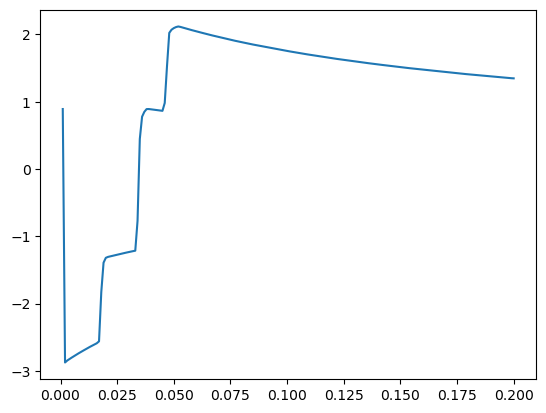

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d4ac3da90>

In [170]:
plot(1e-3:1e-3:2e-1, d1)

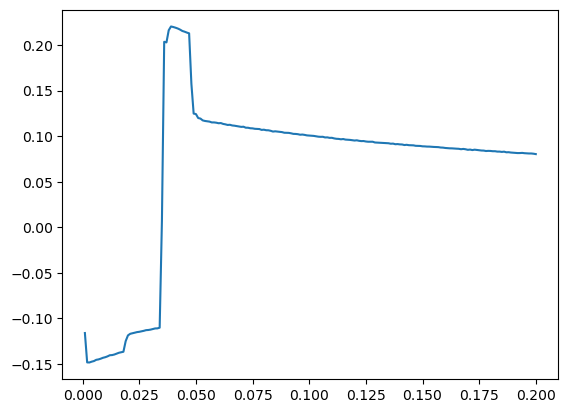

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d4ac1ebe0>

In [171]:
plot(1e-3:1e-3:2e-1, d2)

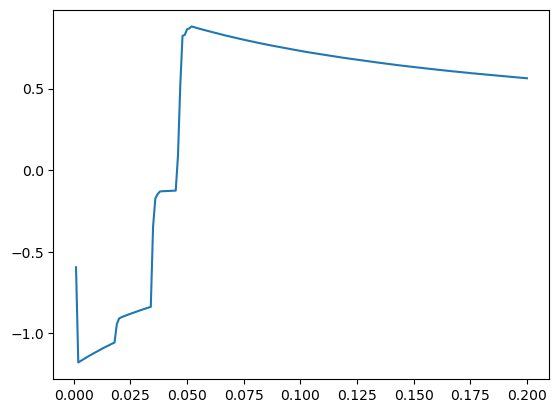

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d4ab857f0>

In [172]:
plot(1e-3:1e-3:2e-1, d3)

In [165]:
findall(x -> x==0, d1)

0-element Array{Int64,1}

In [166]:
findall(x -> x==0, d2)

0-element Array{Int64,1}

In [167]:
findall(x -> x==0, d3)

0-element Array{Int64,1}

# Arrumando algoritmo de gradiente

In [30]:
function calc_grad(v)
    d1 = d.calcula_derivada(net, v[1], 1)
    d2 = d.calcula_derivada(net, v[2], 2)
    d3 = d.calcula_derivada(net, v[2], 2)
    return [d1,d2,d3]
end

calc_grad (generic function with 1 method)

In [37]:
function grad(x0, net, lr=0.001)
    dados = Array{Float64,1}()
    x = x0
    while sum(abs.(calc_grad(x)) .> 0.01) != 0
        x = x .- calc_grad(x)*lr
        epa.update_network_values(net, x)
        value_y = epa.simula(net, x[1], 1)
        append!(dados, value_y)
    end
    return dados
end
    
# rg1 = 0.012 # 0.01
# rg2 = 0.001 # 0.079
# rg3 = 0.01 # 0.115
x0 = [0.012,0.001,0.01]
dados = grad(x0, net)
plot(dados)

MethodError: MethodError: no method matching update_network_values(::Main.epanet.Network, ::Array{Float64,1})
Closest candidates are:
  update_network_values(!Matched::Main.epanet.Network, ::Any) at /home/augusto/Documents/IC-2020/optimized-calibration/src/epanet/epanet.jl:98

In [34]:
sum(abs.(calc_grad(x0)) .> 0.01) == 0

false